In [3]:
library(Seurat)
library(dplyr)
library(biomaRt)
library(stringr)
library(ggplot2)
library(cowplot)
library(scales)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



In [2]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"

In [6]:
integrated_meta = read.table(paste(out, "integrated_annotations.txt", sep = ""))

In [4]:
f = paste(out, "obj.analyzed.filtered", sep = "")
load(f, verbose = T)

Loading objects:
  tiss.filtered


# Annotate Frazer cells based on integrative analysis

In [5]:
tiss.filtered_metaORIG = tiss.filtered@meta.data

In [6]:
tiss.filtered@meta.data$major_cell_population = integrated_meta[match(rownames(tiss.filtered@meta.data), rownames(integrated_meta)), "major_cell_population"] 
tiss.filtered@meta.data$minor_cell_population = integrated_meta[match(rownames(tiss.filtered@meta.data), rownames(integrated_meta)), "minor_cell_population"] 

# Visualize annotated cell types

The following functions and any applicable methods accept the dots: CombinePlots
Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

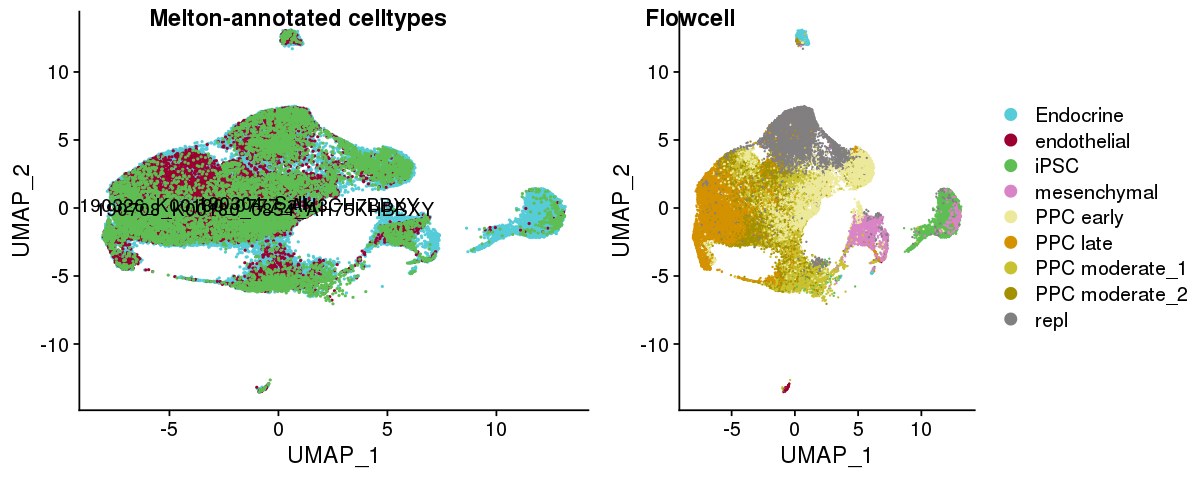

In [7]:
cols = data.frame(celltype = sort(unique(tiss.filtered$major_cell_population)),
                  col = c("#56ccd8", "#9c0031", "#5ebd53", "#d984c6", "#ede99a", "#d49100", "#c9c230", "#a39000", "#827f80"))

options(repr.plot.width = 10, repr.plot.height = 4)
p1 <- DimPlot(tiss.filtered, reduction.use = "umap", label = T, pt.size = .25, group.by = "run", cols = cols$col) + NoLegend()
p2 <- DimPlot(tiss.filtered, reduction = "umap", group.by = "major_cell_population", cols = cols$col)
plot_grid(p1, p2, labels=c('Melton-annotated celltypes', 'Flowcell'))

### Conclusion:

Melton-based annotations and pseudotime delineate distinct cellular trajectories during iPSC-PPC differentiation 

# Fraction of cells belonging to each cell type

Var1,Freq,Frac
<fct>,<int>,<dbl>
Endocrine,794,0.9003493
endothelial,349,0.3957455
iPSC,8273,9.3810949
mesenchymal,3556,4.0322946
PPC early,13880,15.7391028
PPC late,17139,19.4346170
PPC moderate_1,17096,19.3858575
PPC moderate_2,14697,16.6655327
repl,12404,14.0654057


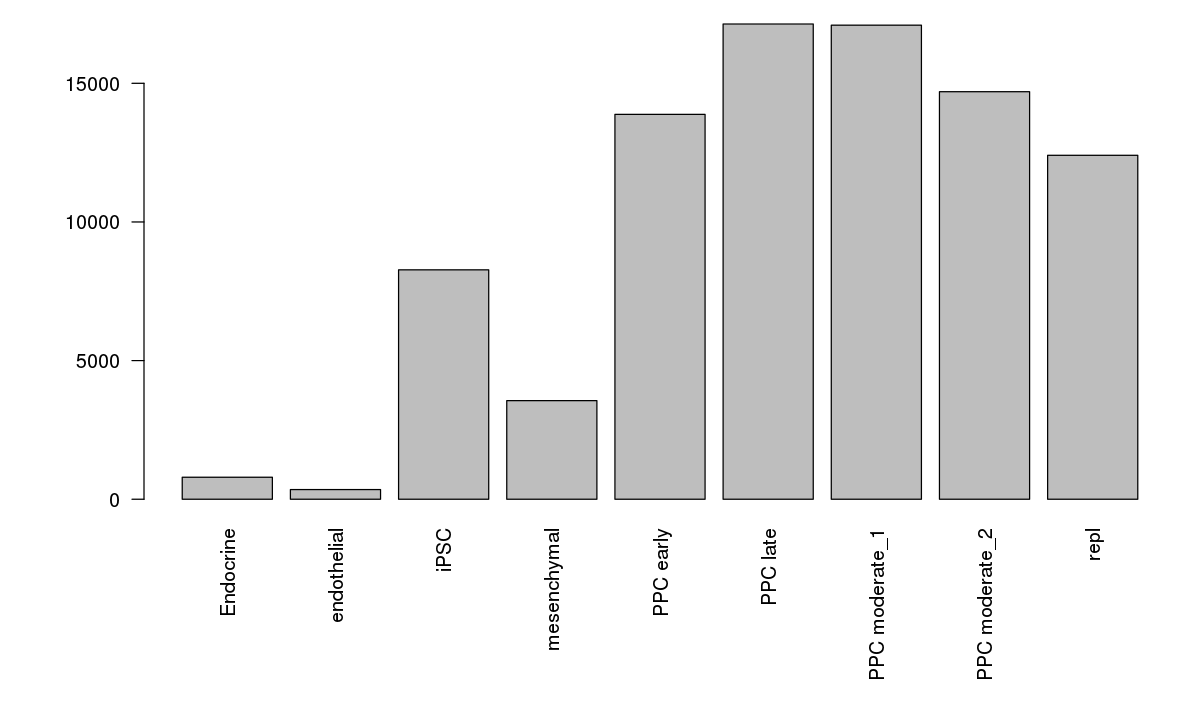

In [35]:
options(repr.plot.width = 10, repr.plot.height = 6)
par(mar = c(9,6, 1, 1))
data = table(tiss.filtered@meta.data$major_cell_population)

x = as.data.frame(data)
x$Frac = (x$Freq/sum(x$Freq)) *100
x
barplot(data, las = 2)

In [46]:

tiss.filtered@meta.data$subject_collapsed = tiss.filtered@meta.data$label2
#matched fresh frozen
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "C0005", "subject_collapsed"] = "C0005_PPC_PPC027"
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "Q0115", "subject_collapsed"] = "Q0115_PPC_PPC023"
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "T104", "subject_collapsed"]  = "T104_PPC_PPC034"
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "T600", "subject_collapsed"]  = "T600_PPC_PPC029"

#only frozen
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "P0353", "subject_collapsed"]  = "P0353_PPC_PPC150"
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "T151", "subject_collapsed"]   = "T151_PPC_PPC051"
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "S02307", "subject_collapsed"] = "S02307_PPC_PPC134"


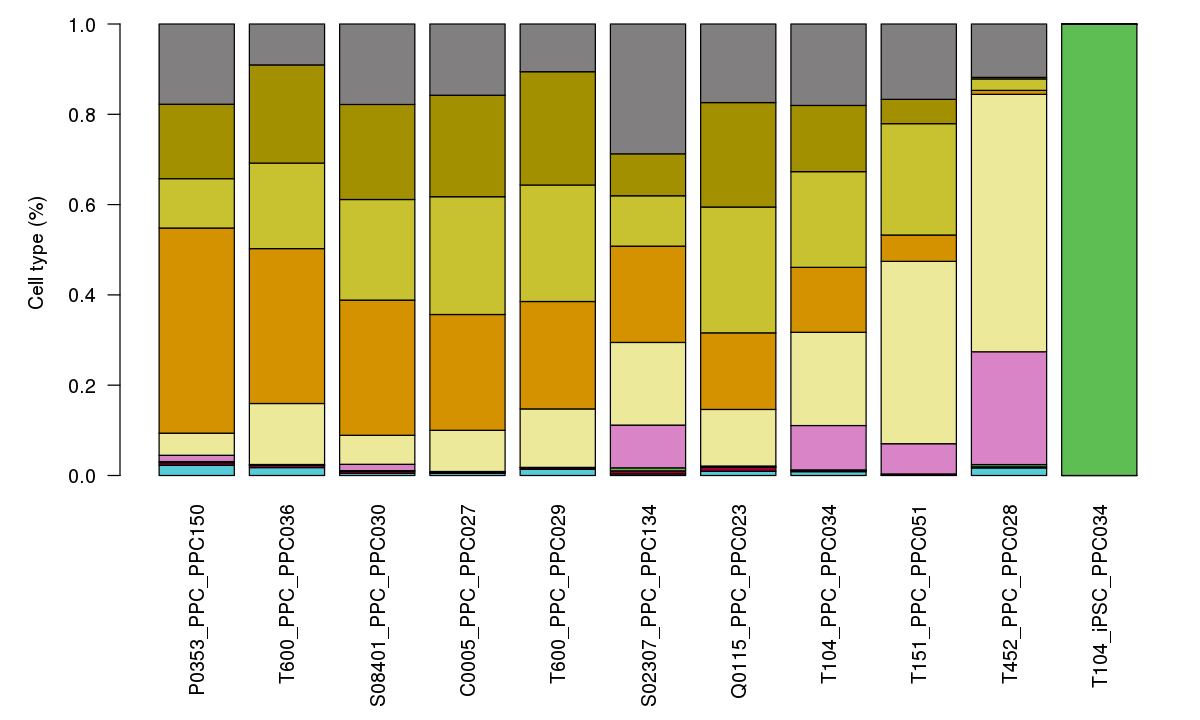

In [56]:

par(mar = c(10, 5, 1, 1))

barfrac = as.matrix(table(tiss.filtered@meta.data$subject_collapsed, tiss.filtered@meta.data$major_cell_population))
barfrac_fractions = barfrac

barfrac_fractions[1,] = barfrac_fractions[1,] / sum(barfrac_fractions[1,])
barfrac_fractions[2,] = barfrac_fractions[2,] / sum(barfrac_fractions[2,])
barfrac_fractions[3,] = barfrac_fractions[3,] / sum(barfrac_fractions[3,])
barfrac_fractions[4,] = barfrac_fractions[4,] / sum(barfrac_fractions[4,])
barfrac_fractions[5,] = barfrac_fractions[5,] / sum(barfrac_fractions[5,])
barfrac_fractions[6,] = barfrac_fractions[6,] / sum(barfrac_fractions[6,])
barfrac_fractions[7,] = barfrac_fractions[7,] / sum(barfrac_fractions[7,])
barfrac_fractions[8,] = barfrac_fractions[8,] / sum(barfrac_fractions[8,])
barfrac_fractions[9,] = barfrac_fractions[9,] / sum(barfrac_fractions[9,])
barfrac_fractions[10,] = barfrac_fractions[10,] / sum(barfrac_fractions[10,])
barfrac_fractions[11,] = barfrac_fractions[11,] / sum(barfrac_fractions[11,])


barfrac_fractions = barfrac_fractions[order(-barfrac_fractions[, 6]), ]

my_color_palette <- hue_pal()(ncol(barfrac_fractions))
barplot(t(barfrac_fractions), las = 2, col = cols$col, ylab = "Cell type (%)")


In [58]:
t1 = read.csv("../Table/PPC_pilot_sequenced_samples.csv")[1:12,]
t1.temp = t1[! is.na(t1$PDX1_NKX61), ]
t1.temp = t1.temp[order(-t1.temp$PDX1_NKX61),]
t1.temp$UDID = gsub("_", "", t1.temp$UDID)

In [87]:
barfrac = as.matrix(table(tiss.filtered@meta.data$subject_collapsed, tiss.filtered@meta.data$major_cell_population))
barfrac_fractions = barfrac

barfrac_fractions[1,] = barfrac_fractions[1,] / sum(barfrac_fractions[1,])
barfrac_fractions[2,] = barfrac_fractions[2,] / sum(barfrac_fractions[2,])
barfrac_fractions[3,] = barfrac_fractions[3,] / sum(barfrac_fractions[3,])
barfrac_fractions[4,] = barfrac_fractions[4,] / sum(barfrac_fractions[4,])
barfrac_fractions[5,] = barfrac_fractions[5,] / sum(barfrac_fractions[5,])
barfrac_fractions[6,] = barfrac_fractions[6,] / sum(barfrac_fractions[6,])
barfrac_fractions[7,] = barfrac_fractions[7,] / sum(barfrac_fractions[7,])
barfrac_fractions[8,] = barfrac_fractions[8,] / sum(barfrac_fractions[8,])
barfrac_fractions[9,] = barfrac_fractions[9,] / sum(barfrac_fractions[9,])
barfrac_fractions[10,] = barfrac_fractions[10,] / sum(barfrac_fractions[10,])
barfrac_fractions[11,] = barfrac_fractions[11,] / sum(barfrac_fractions[11,])

barfrac_fractions = barfrac_fractions[order(-barfrac_fractions[, 6]), ]



barfrac_fractions = cbind(barfrac_fractions, gsub("_", "", str_split_fixed(rownames(barfrac_fractions), "_", 3)[,3]))
barfrac_fractions = cbind(barfrac_fractions, t1.temp[match(barfrac_fractions[, ncol(barfrac_fractions)], t1.temp$UDID), "PDX1_NKX61"]  )
barfrac_fractions = cbind(barfrac_fractions, t1.temp[match(barfrac_fractions[, ncol(barfrac_fractions) - 1], t1.temp$UDID), "PDX1"]  )
barfrac_fractions = cbind(barfrac_fractions, t1.temp[match(barfrac_fractions[, ncol(barfrac_fractions) - 2], t1.temp$UDID), "NKX61"]  )

barfrac_fractions = barfrac_fractions[1:nrow(barfrac_fractions)-1, ] #remove iPSC
barfrac_fractions = as.data.frame(barfrac_fractions)

In [167]:
PlotFACS <- function(x, y){
    
    
    plot(as.numeric(barfrac_fractions[,x]) * 100, as.numeric(barfrac_fractions[,y]), col = (cols$col), pch = 19, cex = 1.5, las = 1,
    xlab = x, ylab = "% PDX1+/NKX6.1+",
    xlim = c(0,100), ylim = c(0,100),    
    )
    text(as.numeric(barfrac_fractions[,x]) * 100, as.numeric(barfrac_fractions[,y]), rownames(barfrac_fractions), cex = .8, pos = 4)
    
    xplot = as.numeric(barfrac_fractions[,x]) * 100
    yplot = as.numeric(barfrac_fractions[,y])
    
    abline(lm(yplot ~ xplot),col = "black")
    p = round(cor.test(yplot , xplot, method = "spearman")$p.val, 3)
    rho = round(as.numeric(str_split_fixed(cor.test(yplot , xplot, method = "spearman")$estimate, ":", 2)[1]), 2)
    text(92, 90, paste("p = ", p, sep = ""), cex = .95, col = "red")
    text(92, 80, paste("rho = ", rho, sep = ""), cex = .95, col = "red")
    
    
    
}

In [142]:
barfrac_fractions$PPC_Early_collapsed  <- as.numeric(barfrac_fractions[, "PPC early"]           )+ as.numeric(barfrac_fractions[, "PPC moderate_1"])
barfrac_fractions$PPC_Late_collapsed   <- as.numeric(barfrac_fractions[, "PPC moderate_2"]      )+ as.numeric(barfrac_fractions[, "PPC late"])
barfrac_fractions$PPC_collapsed        <- as.numeric(barfrac_fractions[, "PPC_Early_collapsed"] )+ as.numeric(barfrac_fractions[, "PPC_Late_collapsed"])

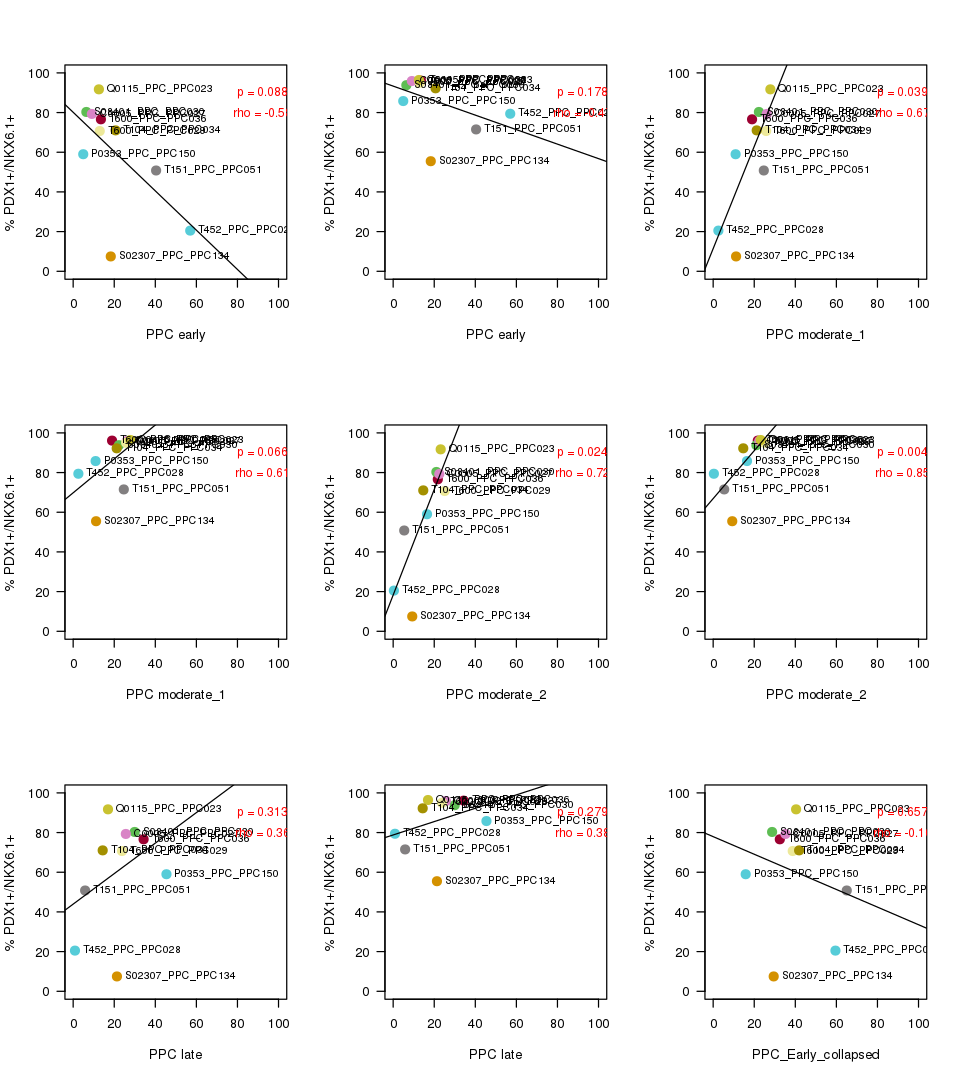

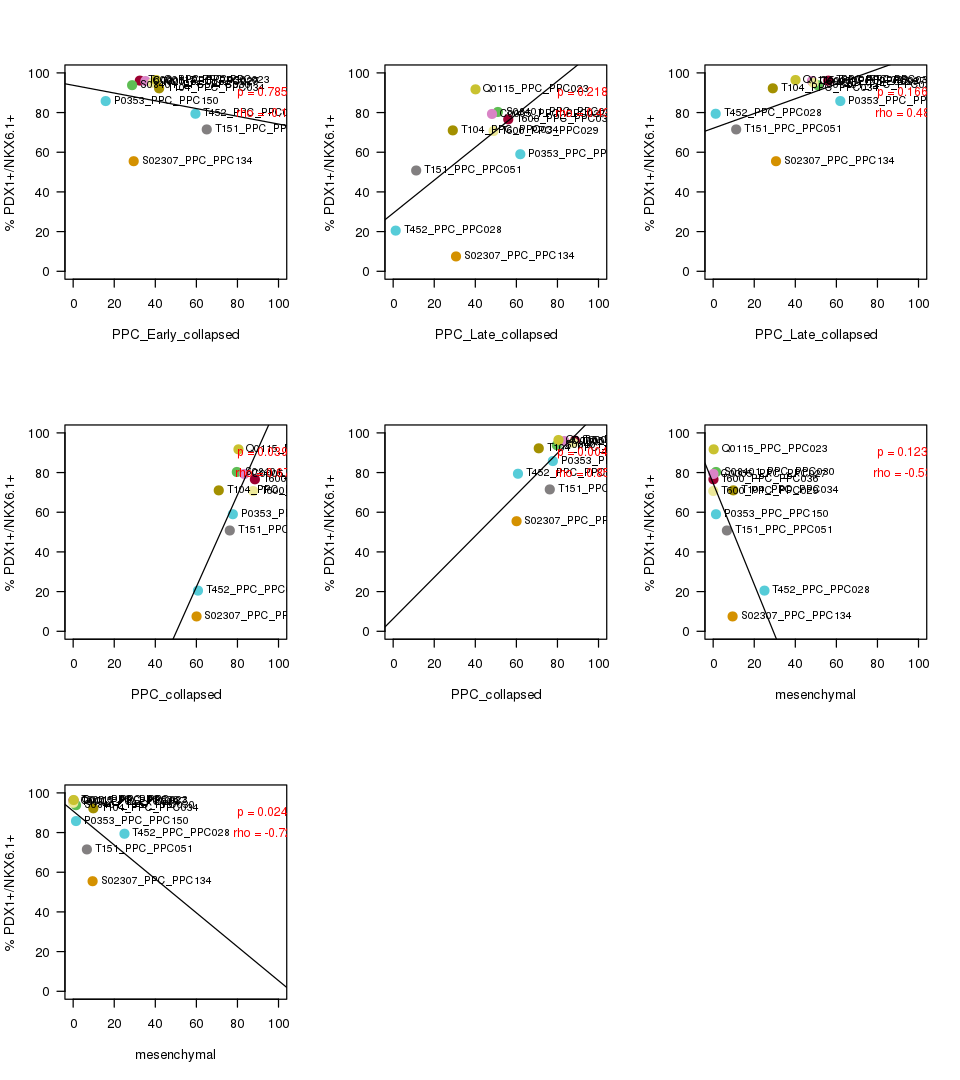

In [187]:
options(repr.plot.width = 8, repr.plot.height = 9)
par(mfrow = c(3,3), xpd=FALSE)
PlotFACS("PPC early", "V11")
PlotFACS("PPC early", "V12")
PlotFACS("PPC moderate_1", "V11")
PlotFACS("PPC moderate_1", "V12")
PlotFACS("PPC moderate_2", "V11")
PlotFACS("PPC moderate_2", "V12")
PlotFACS("PPC late", "V11")
PlotFACS("PPC late", "V12")

PlotFACS("PPC_Early_collapsed", "V11")
PlotFACS("PPC_Early_collapsed", "V12")
PlotFACS("PPC_Late_collapsed", "V11")
PlotFACS("PPC_Late_collapsed", "V12")
PlotFACS("PPC_collapsed", "V11")
PlotFACS("PPC_collapsed", "V12")

PlotFACS("mesenchymal", "V11")
PlotFACS("mesenchymal", "V12")

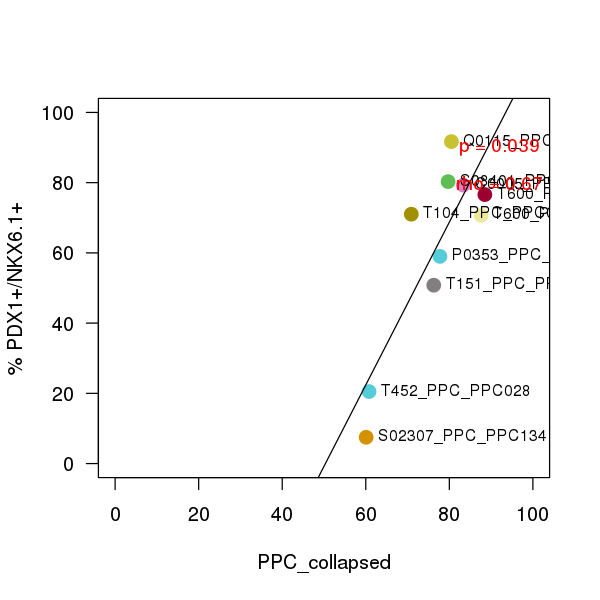

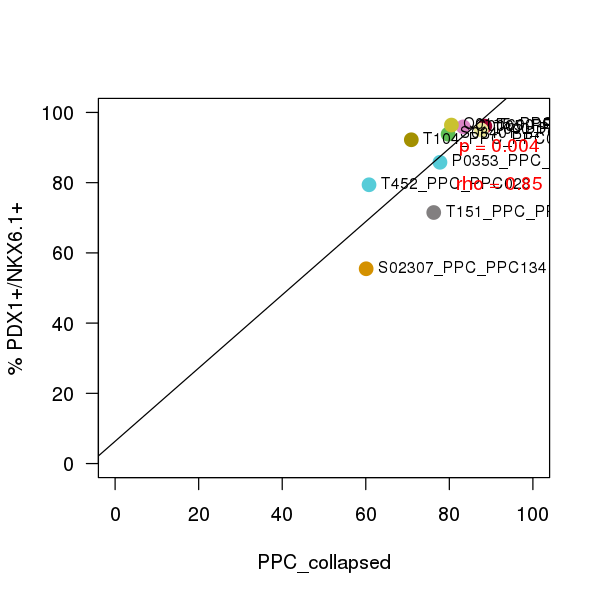

In [169]:
options(repr.plot.width = 5, repr.plot.height = 5)
PlotFACS("PPC_collapsed", "V11")
PlotFACS("PPC_collapsed", "V12")

# Recluster removing iPSCs and repl


In [170]:
# Idents(tiss.filtered) <- "major_cell_population"

In [171]:
# tiss.filtered.noipscrepl = subset(tiss.filtered, idents = c("PPC moderate_1", "PPC moderate_2", "mesenchymal", "PPC early", "PPC late", "Endocrine", "endothelial"))

In [172]:
# tiss.filtered.noipscrepl <- NormalizeData(tiss.filtered.noipscrepl)

In [57]:
# tiss.filtered.noipscrepl <- FindVariableFeatures(tiss.filtered.noipscrepl, selection.method = "vst", nfeatures = 2000)

In [173]:
# tiss.filtered.noipscrepl <- ScaleData(tiss.filtered.noipscrepl)

In [80]:
# tiss.filtered.noipscrepl <- RunPCA(tiss.filtered.noipscrepl, features = VariableFeatures(object = tiss.filtered.noipscrepl))

In [174]:
# tiss.filtered.noipscrepl <- RunUMAP(tiss.filtered.noipscrepl, dims = 1:15)

In [85]:
# cols = data.frame(celltype = sort(unique(tiss.filtered.noipscrepl$major_cell_population)),
                  col = c("#56ccd8", "#9c0031", "#d984c6", "#ede99a", "#d49100", "#c9c230", "#a39000"))

The following functions and any applicable methods accept the dots: CombinePlots


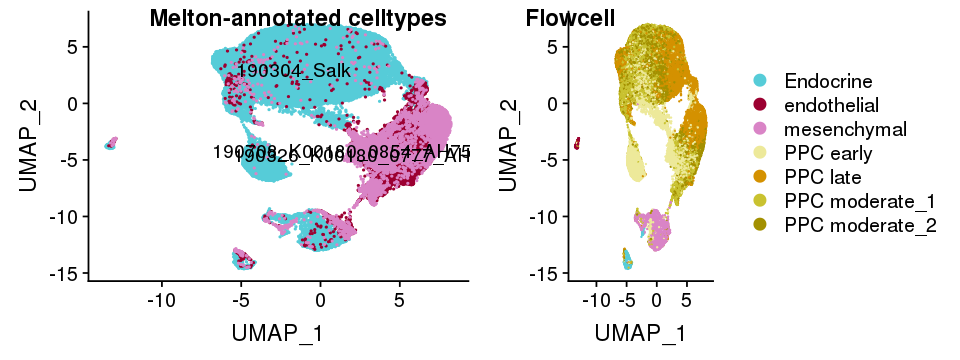

In [94]:
options(repr.plot.width = 8, repr.plot.height = 3)
p1 <- DimPlot(tiss.filtered.noipscrepl, reduction.use = "umap", label = T, pt.size = .25, group.by = "run", cols = cols$col) + NoLegend()
p2 <- DimPlot(tiss.filtered.noipscrepl, reduction = "umap", group.by = "major_cell_population", cols = cols$col)
plot_grid(p1, p2, labels=c('Melton-annotated celltypes', 'Flowcell'))

### Conclusion:

Removing replicating and iPSC cells removes a large amount of variability across cells, highlighting another source of variability: batch. As this removes too much variability, downstream analysis will include replicating and iPSC cells.

# Look at differentially expressed genes over pseudotime in PPC cells

Now that we've established the various cell types (trajectory and time differences), we will ask what genes are impacting these changes (i.e. genes who are differentially expressed over time)

In [4]:
load(paste(out, "obj.integrated.frazer.melton_cluster0_pseudotime", sep = ""), verbose = T)
cds

Loading objects:
  cds


Loading required package: monocle3
Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    un

class: cell_data_set 
dim: 58358 74303 
metadata(1): cds_version
assays(1): counts
rownames(58358): DDX11L1 WASH7P ... RNF212B TMEM269
rowData names(2): id gene_short_name
colnames(74303): AATGGAACACTGAGGA-1 AGATCCATCGAAACAA-1 ...
  x1_S6c_b2.bcCDKI x1_S6c_b2.bcCKKM
colData names(35): orig.ident nCount_RNA ... RNA_snn_res.0.3
  Size_Factor
reducedDimNames(2): PCA UMAP
spikeNames(0):

In [7]:
pData(cds)$pseudotime_bin = integrated_meta[match(rownames(pData(cds)), rownames(integrated_meta)), "major_cell_population"] 

Cells aren't colored in a way that allows them to be grouped.


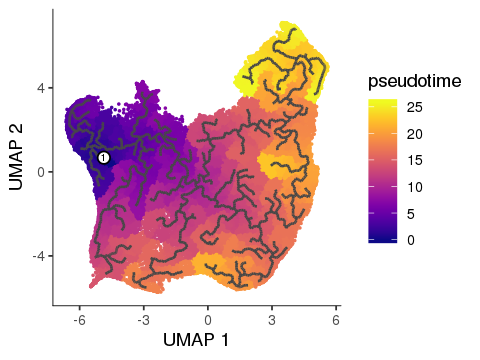

In [6]:
options(repr.plot.width = 4, repr.plot.height = 3)
plot_cells(cds,
           color_cells_by = "pseudotime",
           label_groups_by_cluster=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE)

In [78]:
# bin time by quantiles
pseudotime_ppc = as.data.frame(pseudotime(cds))
colnames(pseudotime_ppc) = "pseudotime"
quants = as.data.frame(quantile(pseudotime_ppc$pseudotime))

pseudotime_ppc$quants = NA
pseudotime_ppc$pseudotime = as.numeric(pseudotime_ppc$pseudotime)

pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[1, 1] & pseudotime_ppc$pseudotime <= quants[2, 1],  "quants" ] = "PPC_1"
pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[2, 1] & pseudotime_ppc$pseudotime <= quants[3, 1],  "quants" ] = "PPC_2"
pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[3, 1] & pseudotime_ppc$pseudotime <= quants[4, 1],  "quants" ] = "PPC_3"
pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[4, 1] & pseudotime_ppc$pseudotime <= quants[5, 1],  "quants" ] = "PPC_4"


pData(cds)$pseudotime_quantile = pseudotime_ppc[match(rownames(pData(cds)), rownames(pseudotime_ppc)), "quants"]

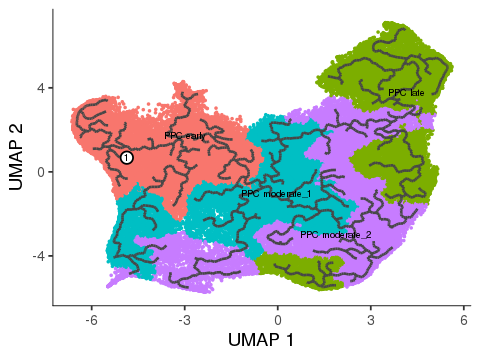

In [14]:
options(repr.plot.width = 4, repr.plot.height = 3)
plot_cells(cds,
           color_cells_by = "pseudotime_quantile",
           label_groups_by_cluster=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE)

# Examine known marker genes that change expression during PPC development

In [15]:
genes = c("PDX1", "NKX6-1", "CHGA")

lineage_cds = cds[rowData(cds)$gene_short_name %in% genes,]

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

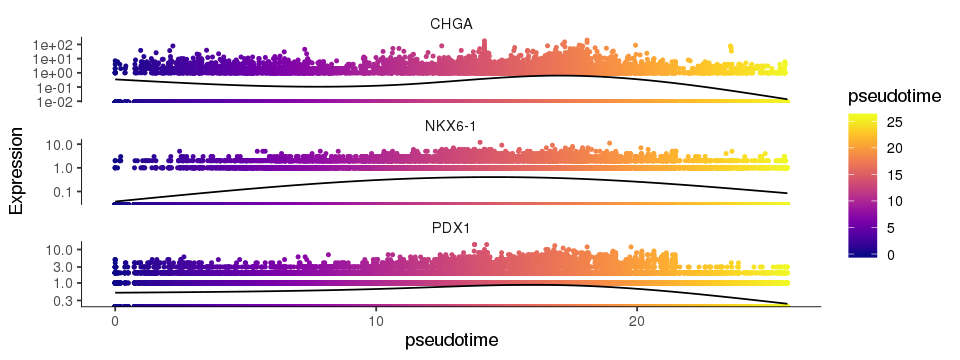

In [19]:
options(repr.plot.width = 8, repr.plot.height = 3)
plot_genes_in_pseudotime(lineage_cds, 
                         color_cells_by="pseudotime")

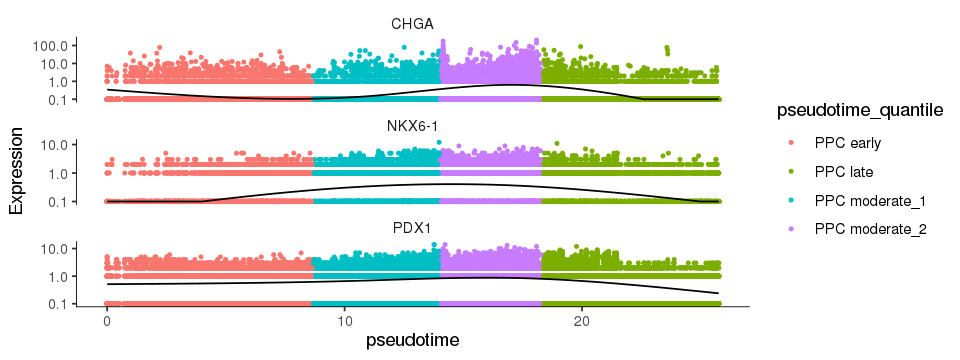

In [18]:
options(repr.plot.width = 8, repr.plot.height = 3)
plot_genes_in_pseudotime(lineage_cds, 
                         color_cells_by="pseudotime_quantile",
                         min_expr=0.1)

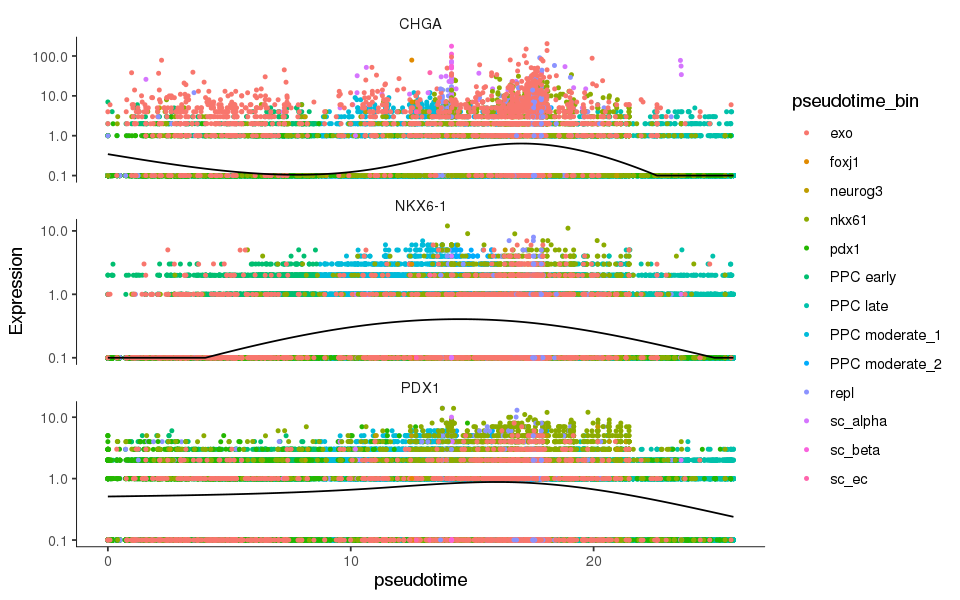

In [21]:
options(repr.plot.width = 8, repr.plot.height = 5)
plot_genes_in_pseudotime(lineage_cds, 
                         color_cells_by="pseudotime_bin",
                         min_expr=0.1)

### Regression analysis 

(~pseudotime_bin + study)

i.e. genes that differ between pseudotime bins and removing study effects


#### identify genes that are 'different' between pseudotime bins in order to reduce the number of genes tested in the LR

In [10]:
marker_test_res <- top_markers(cds, group_cells_by="pseudotime_quantile", 
                               reference_cells=1000, cores=8)

  |=======================================================| 100%, Elapsed 00:07
  |=======================================================| 100%, Elapsed 00:30


In [23]:
top_specific_markers <- marker_test_res %>%
                            filter(fraction_expressing >= 0.10) %>%
                            group_by(cell_group) %>%
                            top_n(10, pseudo_R2)

top_specific_marker_ids <- unique(top_specific_markers %>% pull(gene_id))

Warning message in if (axis_order == "marker_group") {:
“the condition has length > 1 and only the first element will be used”

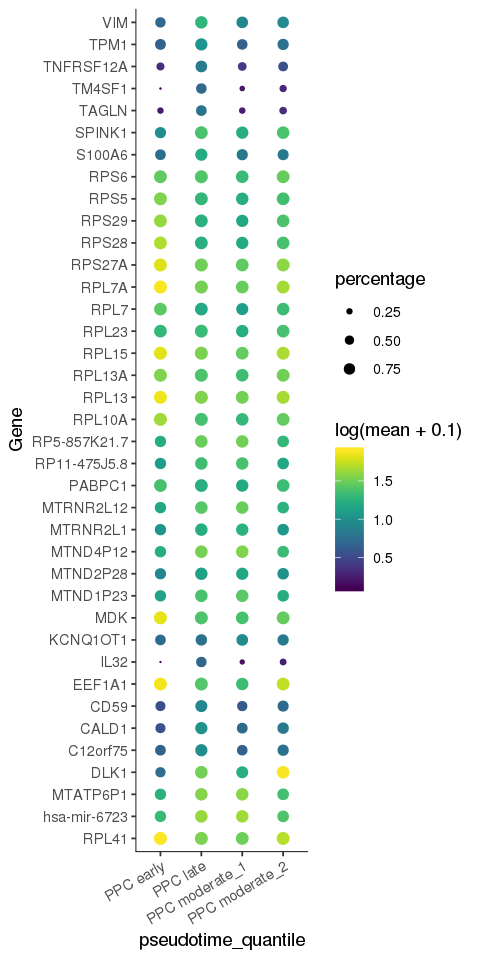

In [25]:
options(repr.plot.width = 4, repr.plot.height = 8)
plot_genes_by_group(cds,
                    top_specific_marker_ids,
                    group_cells_by="pseudotime_quantile",
                    ordering_type="maximal_on_diag",
                    max.size=3)

In [59]:
top_specific_markers <- marker_test_res %>%
                            filter(fraction_expressing >= 0.10) %>%
                            filter(marker_test_q_value < 0.05) %>%
                            group_by(cell_group) %>%
                            top_n(10, pseudo_R2)

top_specific_marker_ids <- unique(top_specific_markers %>% pull(gene_id))

In [87]:
# bin time by quantiles
pseudotime_ppc = as.data.frame(pseudotime(cds))
colnames(pseudotime_ppc) = "pseudotime"
quants = as.data.frame(quantile(pseudotime_ppc$pseudotime))

pseudotime_ppc$quants = NA
pseudotime_ppc$pseudotime = as.numeric(pseudotime_ppc$pseudotime)

pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[1, 1] & pseudotime_ppc$pseudotime <= quants[2, 1],  "quants" ] = 1
pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[2, 1] & pseudotime_ppc$pseudotime <= quants[3, 1],  "quants" ] = 2
pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[3, 1] & pseudotime_ppc$pseudotime <= quants[4, 1],  "quants" ] = 3
pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[4, 1] & pseudotime_ppc$pseudotime <= quants[5, 1],  "quants" ] = 4


pData(cds)$pseudotime_quantile_num = pseudotime_ppc[match(rownames(pData(cds)), rownames(pseudotime_ppc)), "quants"]

In [169]:
write.table(pseudotime_ppc, paste(out, "integrated_cluster0_pseudotime.txt", sep = ""))

In [88]:
cds_subset <- cds[rowData(cds)$gene_short_name %in% top_specific_marker_ids,]

In [119]:
pData(cds_subset)$RNA_snn_res.0.3 <- as.numeric(pData(cds_subset)$RNA_snn_res.0.3)

In [160]:
head(time_batch_models)

In [144]:
gene_fits <- fit_models(cds_subset, model_formula_str = "~pseudotime")

In [145]:
fit_coefs <- coefficient_table(gene_fits)

In [146]:
fit_coefs <- fit_coefs[, c(1, 2, 5:13)]

In [147]:
table(fit_coefs$term)


(Intercept)  pseudotime 
         36          36 

In [148]:
pseudotime_bin_terms <- fit_coefs %>% filter(! term == "(Intercept)")

In [149]:
results <- pseudotime_bin_terms[pseudotime_bin_terms$q_value < 0.05, c("gene_short_name", "term", "q_value", "estimate")]

In [154]:
top5 = results[order(-abs(results$estimate)), ]$gene_short_name[1:5]

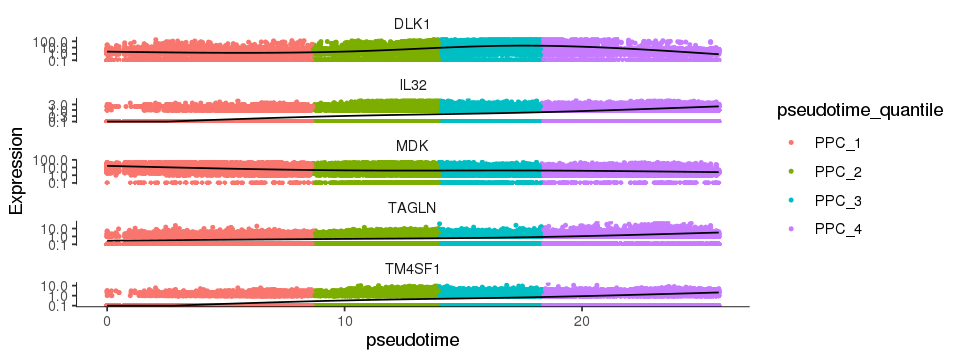

In [155]:
options(repr.plot.width = 8, repr.plot.height = 3)
plot_genes_in_pseudotime(cds_subset[rowData(cds_subset)$gene_short_name %in% top5,], 
                         color_cells_by="pseudotime_quantile",
                         min_expr=0.1)

In [ ]:
# DLK1 = 
# IL32 = 
# MDK = expressed in "multi-potent pancreatic progenitors https://dev.biologists.org/content/develop/early/2019/05/31/dev.173849.full.pdf
# TAGLN = 
# TM4SF1 = 

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 162577 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 162577 rows containing non-finite values (stat_summary).”

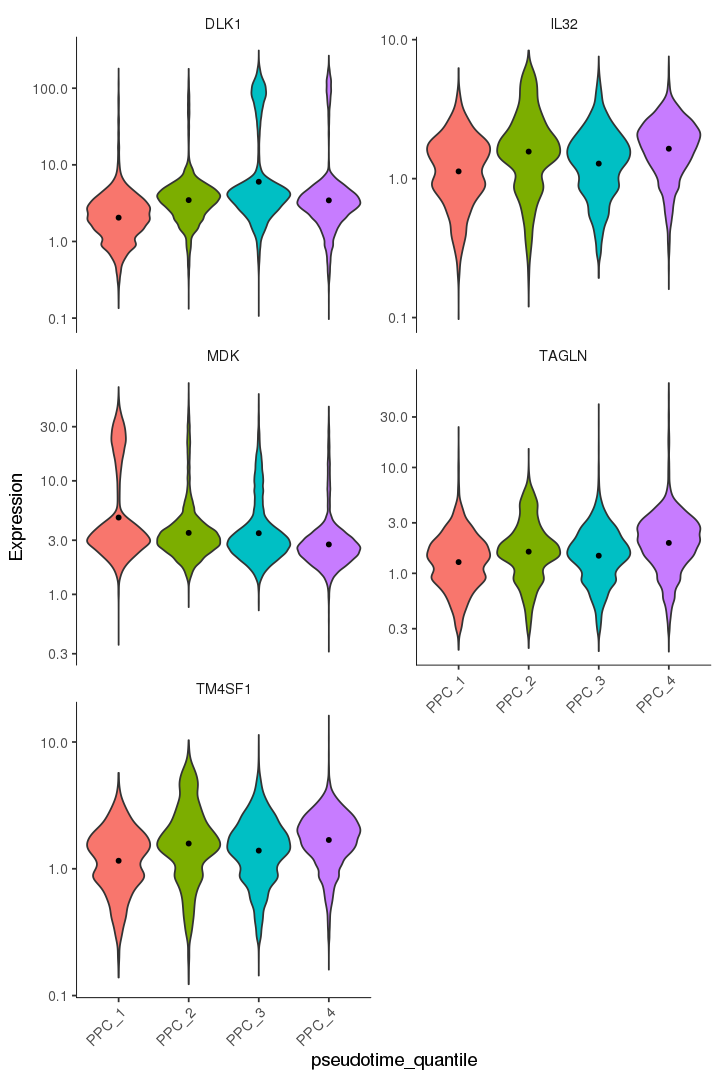

In [158]:
options(repr.plot.width = 6, repr.plot.height = 9)
plot_genes_violin(cds_subset[rowData(cds_subset)$gene_short_name %in% top5,],
                  group_cells_by="pseudotime_quantile", ncol=2) +
      theme(axis.text.x=element_text(angle=45, hjust=1))

### Genes that change as a function of pseudotime

In [179]:
cds_pr_test_res <- graph_test(cds, neighbor_graph="principal_graph", cores=4)
write.table(cds_pr_test_res, file = paste(out, "ppc_de_genes_time_cds_pr_test_res.txt", sep = ""))

In [221]:
cds_pr_test_res = read.table(paste(out, "ppc_de_genes_time_cds_pr_test_res.txt", sep = ""))

In [226]:
pr_deg_ids <- rownames(cds_pr_test_res[ cds_pr_test_res$q_value < 0.05 & cds_pr_test_res$morans_I > 0.35, ])

In [216]:
genes2see <- c("PDX1", "NKX6-1", pr_deg_ids) # morans_I > 0.35
cds_subset <- cds[rowData(cds)$gene_short_name %in% genes2see]

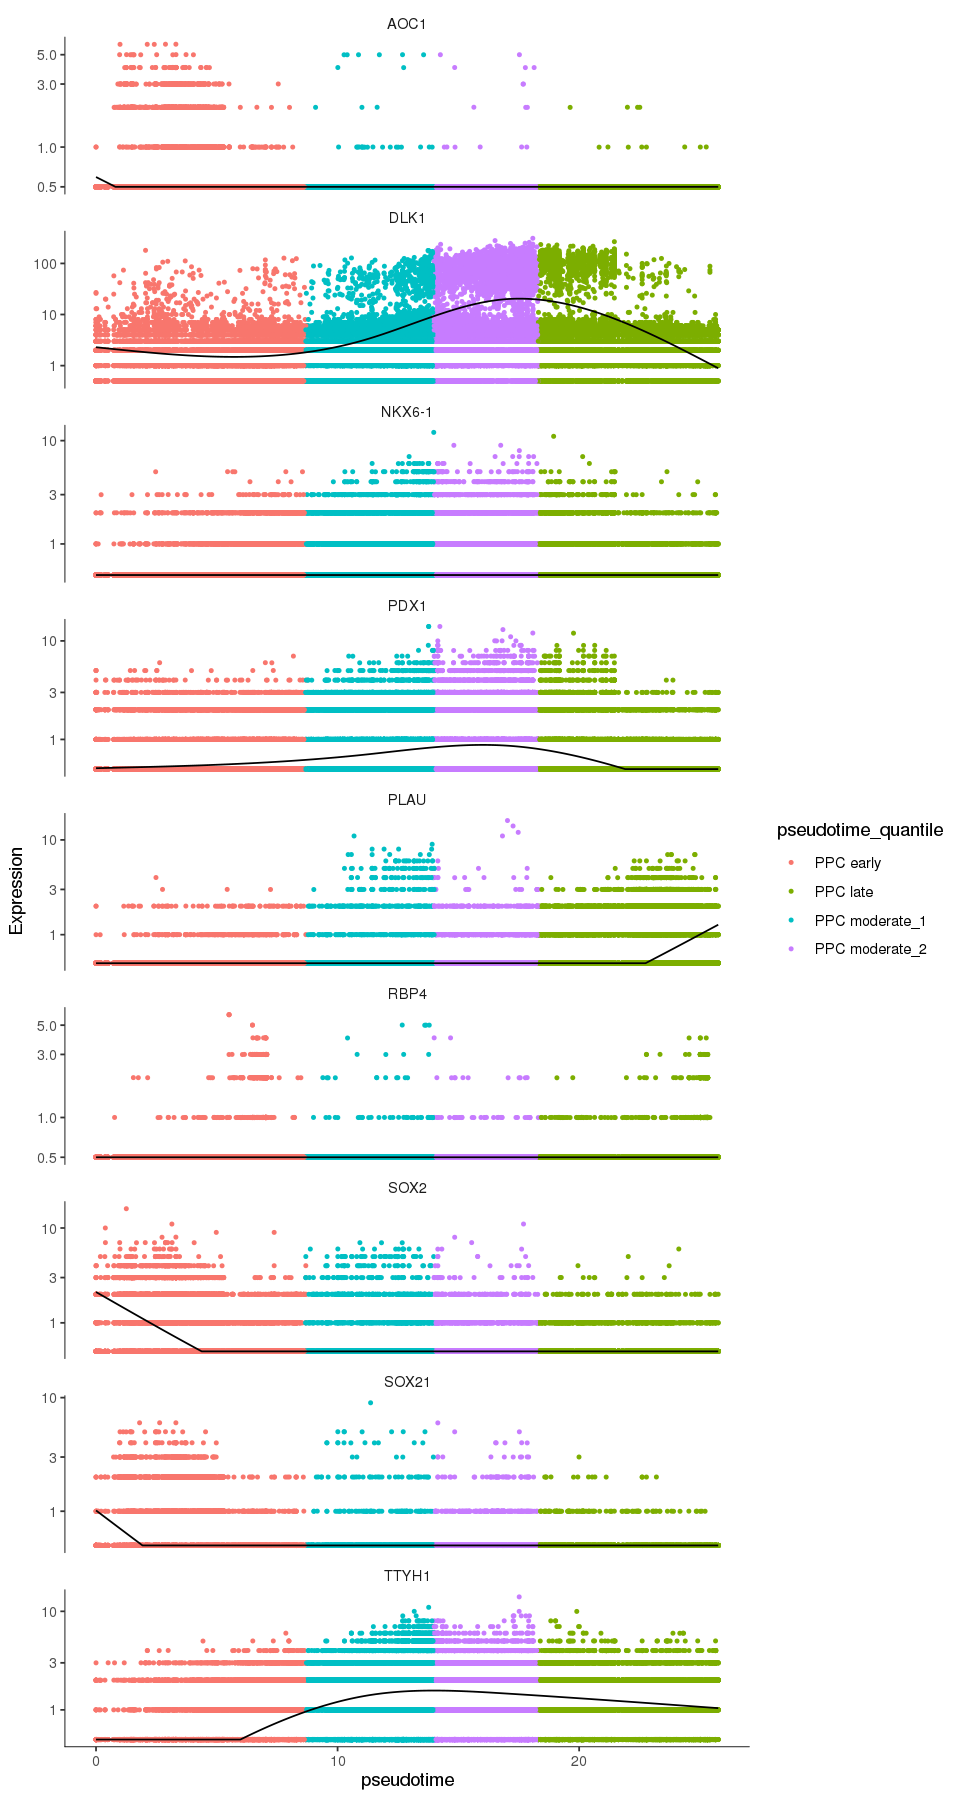

In [218]:
options(repr.plot.width = 8, repr.plot.height = 15)
plot_genes_in_pseudotime(cds_subset,
                         color_cells_by="pseudotime_quantile",
                         min_expr=0.5)

In [242]:
gene_module_df <- find_gene_modules(cds[c("TTYH1"),], resolution=c(0,10^seq(-6,-1)))

ERROR: Error in array(x, c(length(x), 1L), if (!is.null(names(x))) list(names(x), : 'data' must be of a vector type, was 'NULL'


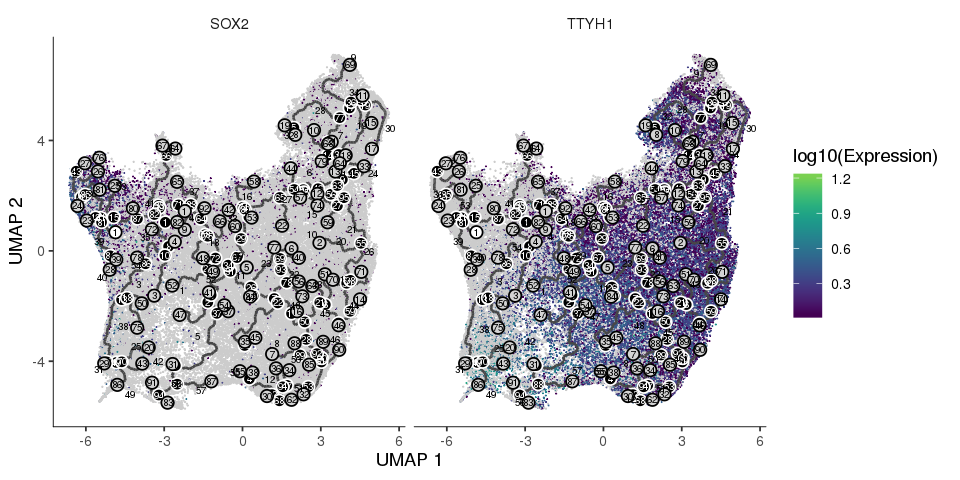

In [243]:
options(repr.plot.width = 8, repr.plot.height = 4)
plot_cells(cds, genes=c("SOX2", "TTYH1"))

In [245]:
head(VariableFeatures(tiss.filtered), 10) 

character(0)

In [239]:
fData(cds)[fData(cds)$gene_short_name %in% pr_deg_ids, ]


cds[pr_deg_ids, 1:2]

DataFrame with 7 rows and 2 columns
               id gene_short_name
      <character>     <character>
SOX2         SOX2            SOX2
AOC1         AOC1            AOC1
PLAU         PLAU            PLAU
RBP4         RBP4            RBP4
SOX21       SOX21           SOX21
DLK1         DLK1            DLK1
TTYH1       TTYH1           TTYH1

class: cell_data_set 
dim: 7 2 
metadata(1): cds_version
assays(1): counts
rownames(7): SOX2 AOC1 ... DLK1 TTYH1
rowData names(2): id gene_short_name
colnames(2): AATGGAACACTGAGGA-1 AGATCCATCGAAACAA-1
colData names(37): orig.ident nCount_RNA ... pseudotime_bin
  pseudotime_quantile
reducedDimNames(2): PCA UMAP
spikeNames(0):

In [ ]:
write.table(gene_module_df, file = paste(out, "ppc_de_genes_time_cds_gene_module_df.txt", sep = ""))

In [ ]:
library(pheatmap)

In [ ]:
cell_group_df <- tibble::tibble(cell=row.names(colData(cds)), 
                                cell_group=partitions(cds)[colnames(cds)])
agg_mat <- aggregate_gene_expression(cds, gene_module_df, cell_group_df)
row.names(agg_mat) <- stringr::str_c("Module ", row.names(agg_mat))
colnames(agg_mat) <- stringr::str_c("Partition ", colnames(agg_mat))

pheatmap::pheatmap(agg_mat, cluster_rows=TRUE, cluster_cols=TRUE,
                   scale="column", clustering_method="ward.D2",
                   fontsize=6)

In [ ]:
plot_cells(cds, 
           genes=gene_module_df %>% filter(module %in% c(1, 2)),
           group_cells_by="partition",
           color_cells_by="partition",
           show_trajectory_graph=FALSE)

# Look at differentially expressed genes between Endocrine and PPCs
1. All PPCs vs. Endocrine
2. Late PPC vs. Endocrine
